### 1. Install Necessary Libraries

In [25]:
pip install numpy==1.26.4 pandas==1.5.3 seaborn==0.13.2 matplotlib==3.9.2 scikit-learn==1.5.2 xgboost==2.1.2 optuna==4.1.0 -q

Note: you may need to restart the kernel to use updated packages.


## 2. Import Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PowerTransformer 
from sklearn.metrics import make_scorer, median_absolute_error
import optuna
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

e:\Download\Fractal\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 3. Load Dataset

In [2]:
df = pd.read_csv('./Dataset/train.csv', index_col="Index")

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
Index,,,,,,,,,,
0,<p>😅The pH value observed is: 0.2644088544860...,<br>😒With a hardness level of 2.6735383052025...,<br>😅The water sample exhibits a total solids ...,1.431972,1.303685,1.563001,0.697062,2.010126,<h1>😀Observing a turbidity value of 1.60887258...,1.252351
1,<p>😇The solution's pH level is 0.012034498894...,<h1>😀The water hardness is measured at 2.6303...,<br>😒The total solids content in the sample is...,0.911372,1.181754,1.741640,0.896108,1.807786,<br>😁The water sample exhibits a turbidity rea...,1.124565
2,<br>😀The pH reading measures 0.491167423175516...,<h2>😅With a hardness level of 1.2213782428674...,<h1>😍The water sample exhibits a total solids ...,1.506492,1.700871,2.322337,1.035440,1.548768,<p>😇Observing a turbidity value of 1.008907465...,0.525886
3,<h1>😅The water sample's pH level is 0.4865531...,<h2>😀With a hardness level of 1.2591335755542...,<h1>😅The total solids content in the sample is...,2.658852,3.035266,2.409255,1.185713,1.232375,<p>😇The water sample exhibits a turbidity read...,0.715288
4,<p>😍The observed pH value of 0.07548804288855...,<p>😁With a hardness level of 1.65681755735377...,<p>😍The total solids content in the sample is ...,2.169616,1.520531,1.990604,1.237182,1.589307,<h1>😒The water sample exhibits a turbidity rea...,0.890722


In [ ]:
# Sample column names for the dataset
columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']

# Function to extract only numeric values from a column
def extract_numbers(value):
    numeric_match = re.findall(r"[-+]?\d*\.\d+|\d+", str(value))
    return float(numeric_match[0]) if numeric_match else None

for col in columns:
    df[col] = df[col].apply(extract_numbers)


In [5]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
Index,,,,,,,,,,
0,0.264409,2.673538,2.336743,1.431972,1.303685,1.563001,0.697062,2.010126,1.000000,1.252351
1,0.012034,1.000000,2.495853,0.911372,1.181754,1.741640,0.896108,1.807786,1.478430,1.124565
2,0.491167,2.000000,1.000000,1.506492,1.700871,2.322337,1.035440,1.548768,1.008907,0.525886
3,1.000000,2.000000,1.000000,2.658852,3.035266,2.409255,1.185713,1.232375,1.249935,0.715288
4,0.075488,1.656818,1.095344,2.169616,1.520531,1.990604,1.237182,1.589307,1.000000,0.890722


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               10000 non-null  float64
 1   Hardness         10000 non-null  float64
 2   Solids           10000 non-null  float64
 3   Chloramines      10000 non-null  float64
 4   Sulfate          10000 non-null  float64
 5   Conductivity     10000 non-null  float64
 6   Organic_carbon   10000 non-null  float64
 7   Trihalomethanes  10000 non-null  float64
 8   Turbidity        10000 non-null  float64
 9   Potability       10000 non-null  float64
dtypes: float64(10)
memory usage: 859.4 KB


In [7]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.966853,1.650817,1.688720,1.577655,1.846947,2.106003,1.253408,1.774500,1.367638,0.964083
std,0.688158,0.529619,0.557058,0.455594,0.534522,0.605440,0.360951,0.516305,0.453559,0.280262
min,0.000208,1.000000,1.000000,0.771551,0.852042,0.960479,0.554247,0.782468,0.505077,0.367202
25%,0.381368,1.044594,1.000000,1.195690,1.404213,1.608786,0.953677,1.358345,1.000000,0.756679
50%,0.994586,1.727482,1.792007,1.516832,1.774148,2.024260,1.204477,1.700410,1.181985,0.924841
75%,2.000000,2.000000,2.000000,1.919671,2.238055,2.537743,1.512738,2.132153,2.000000,1.132913
max,7.413026,2.966829,3.216966,2.974793,3.649794,4.153664,2.507518,3.795695,2.711374,2.219079


In [8]:
df.duplicated().sum()

0

## 4. Data Preprocessing

### Covariance Plot

In [9]:
scaler= StandardScaler()
trans_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
trans_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-1.020810,1.931148,1.163354,-0.319781,-1.016403,-0.896916,-1.541409,0.456392,-0.810604,1.028616
1,-1.387567,-1.228900,1.448992,-1.462522,-1.244527,-0.601845,-0.989931,0.064474,0.244285,0.572641
2,-0.691278,0.659343,-1.236415,-0.156206,-0.273297,0.357335,-0.603900,-0.437227,-0.790964,-1.563605
3,0.048171,0.659343,-1.236415,2.373279,2.223255,0.500904,-0.187553,-1.050060,-0.259523,-0.887768
4,-1.295354,0.011331,-1.065250,1.299382,-0.610699,-0.190613,-0.044954,-0.358707,-0.810604,-0.261773


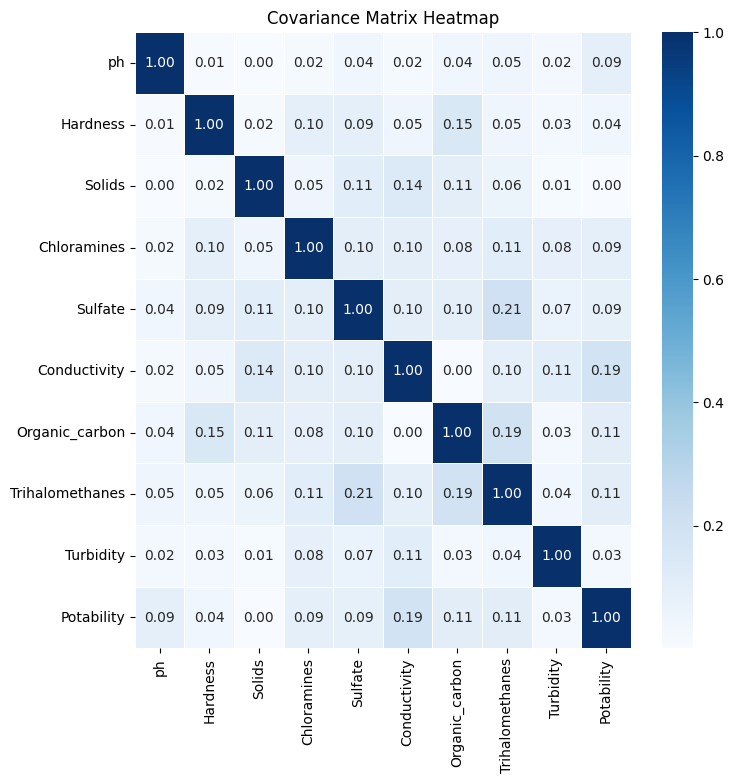

In [10]:
cov_matrix = abs(trans_df.cov())
plt.figure(figsize=(8, 8))
sns.heatmap(cov_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=.5)
plt.title('Covariance Matrix Heatmap')
plt.show()

### Distribution Plot

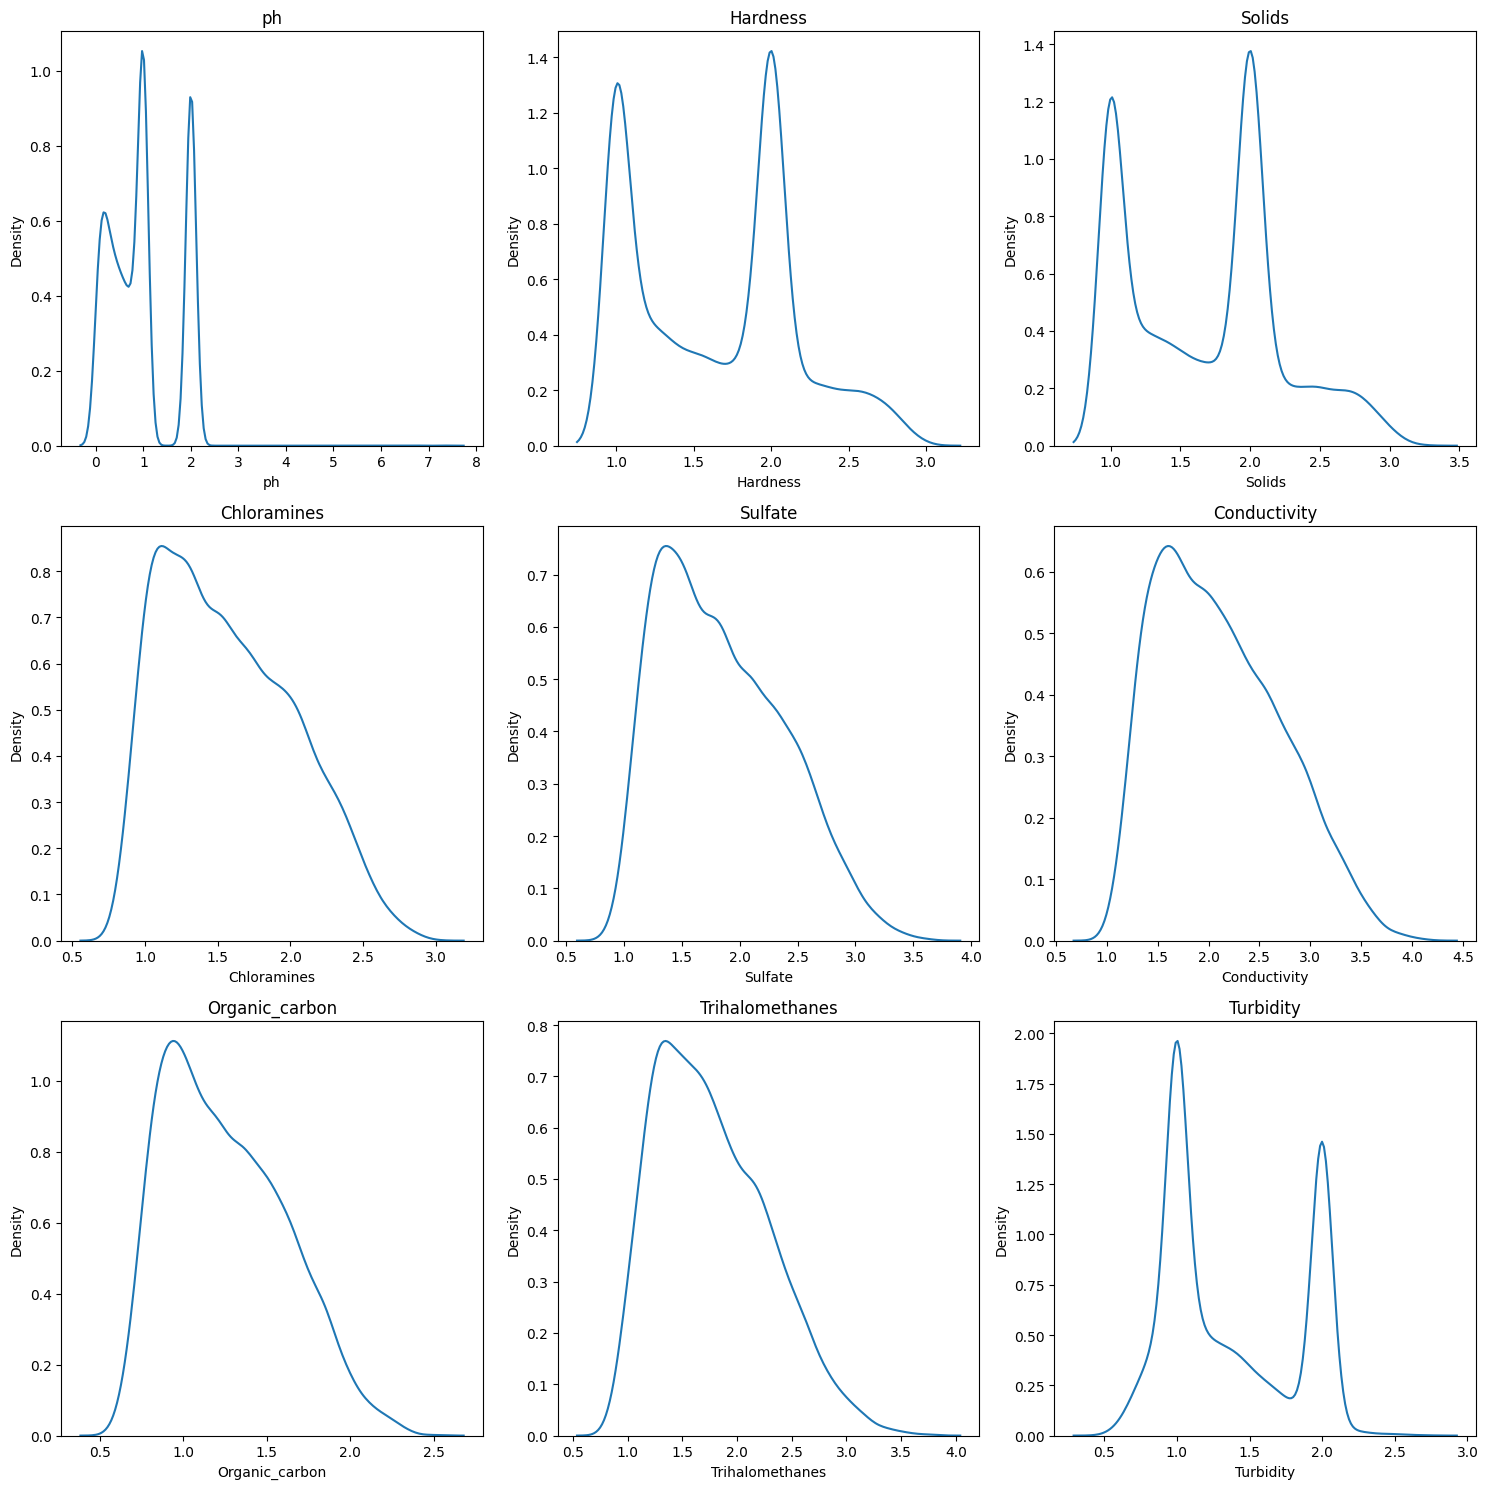

In [11]:
plt.figure(figsize = (15,15))
for ax, col in enumerate(df.columns[:9]):
    plt.subplot(3,3,ax+1)
    plt.title(col)
    sns.kdeplot(x=df[col])
plt.tight_layout()

### Train Test/Val Split

In [12]:
X = df.iloc[: , :-1]
y = df.iloc[:, -1]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Transformation

In [14]:
pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_test)

pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,ph,0.486759
1,Hardness,0.312158
2,Solids,0.309023
3,Chloramines,0.045962
4,Sulfate,-0.008025
5,Conductivity,0.031183
6,Organic_carbon,0.034547
7,Trihalomethanes,-0.002433
8,Turbidity,-0.299191


### Standardization

In [ ]:
scaler= StandardScaler()
X_train_transformed = pd.DataFrame(scaler.fit_transform(X_train_transformed), columns=df.columns[:-1])
X_test_transformed = pd.DataFrame(scaler.fit_transform(X_test_transformed), columns=df.columns[:-1])
X_train_transformed.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-1.020810,1.931148,1.163354,-0.319781,-1.016403,-0.896916,-1.541409,0.456392,-0.810604,1.028616
1,-1.387567,-1.228900,1.448992,-1.462522,-1.244527,-0.601845,-0.989931,0.064474,0.244285,0.572641
2,-0.691278,0.659343,-1.236415,-0.156206,-0.273297,0.357335,-0.603900,-0.437227,-0.790964,-1.563605
3,0.048171,0.659343,-1.236415,2.373279,2.223255,0.500904,-0.187553,-1.050060,-0.259523,-0.887768
4,-1.295354,0.011331,-1.065250,1.299382,-0.610699,-0.190613,-0.044954,-0.358707,-0.810604,-0.261773


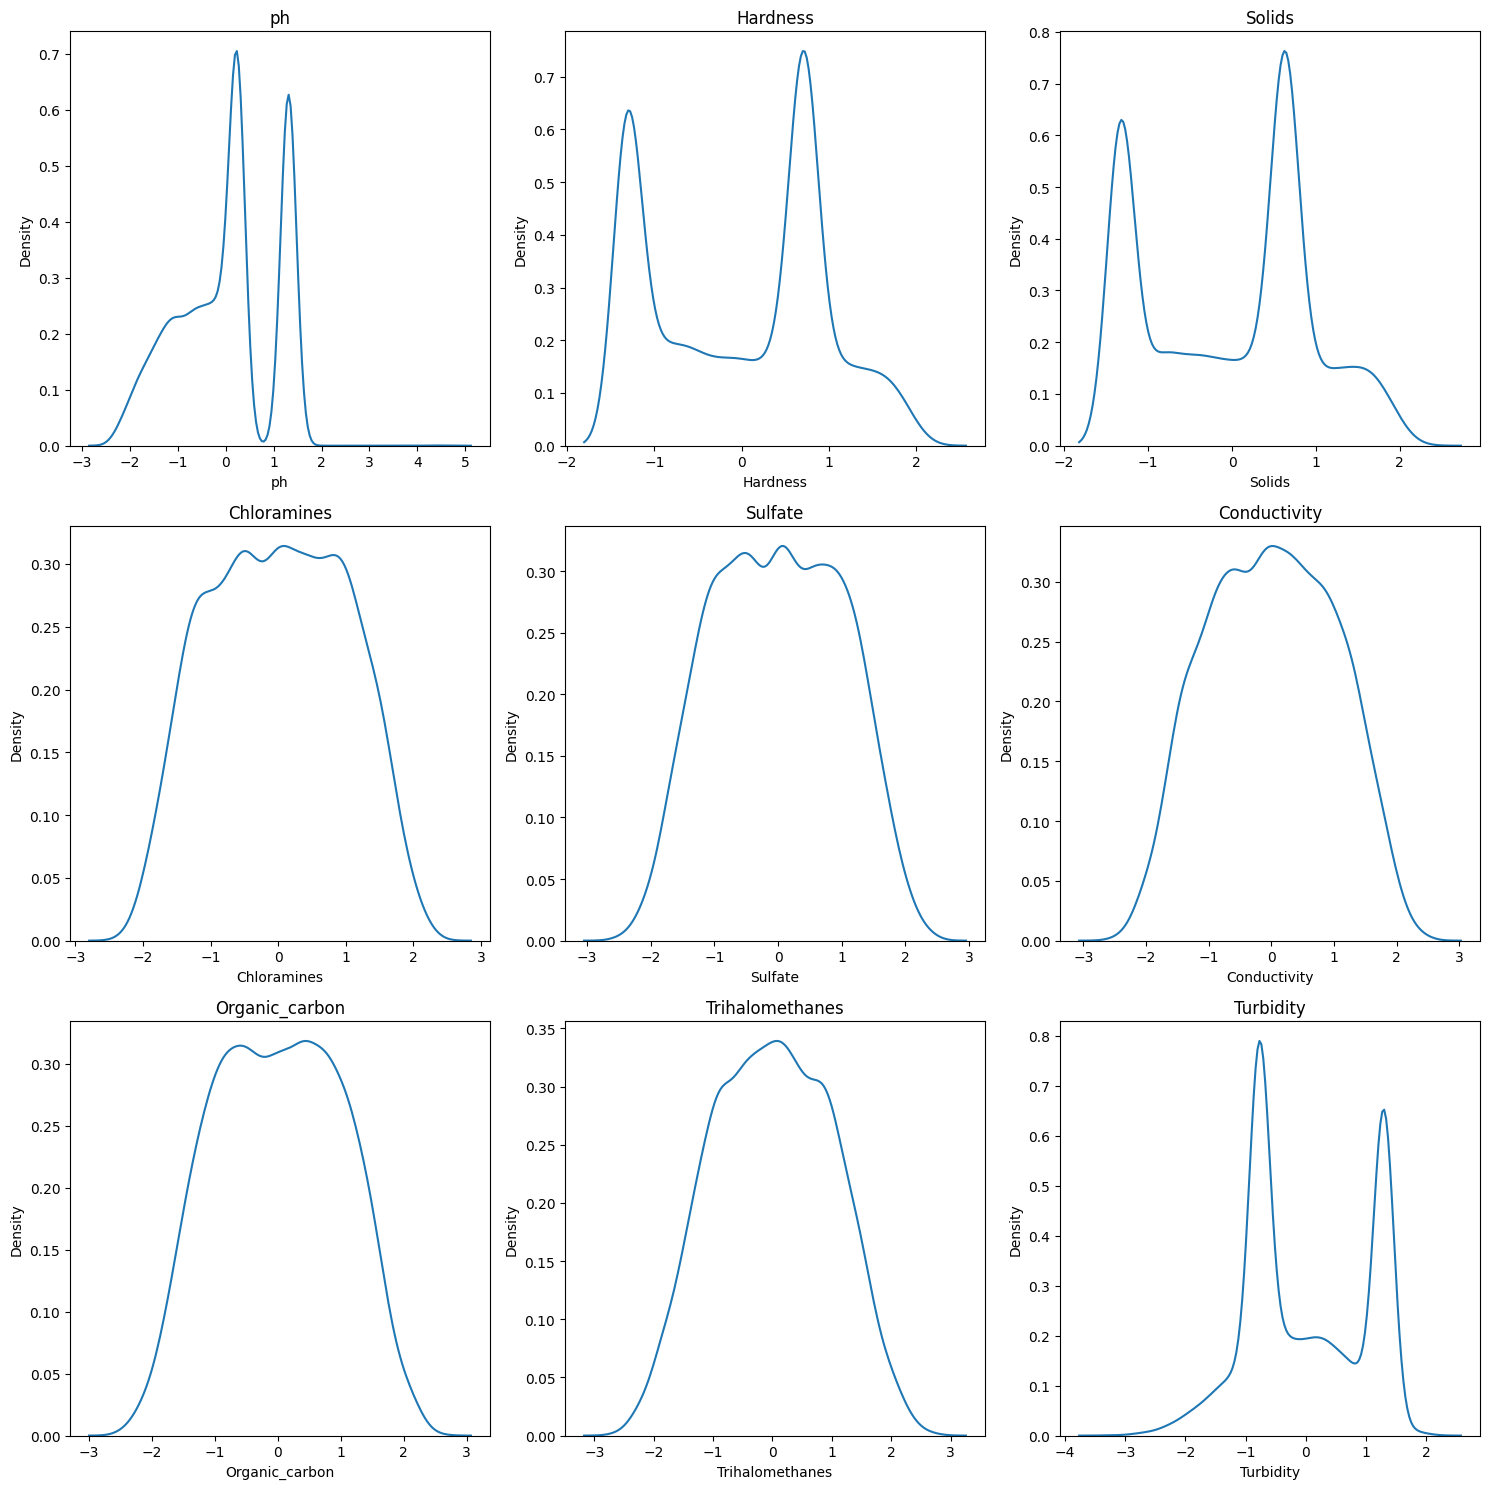

In [16]:
X_train_transformed = pd.DataFrame(X_train_transformed,columns=df.columns[:-1])
plt.figure(figsize = (15,15))
for ax, col in enumerate(X_train_transformed.columns):
    plt.subplot(3,3,ax+1)
    plt.title(col)
    sns.kdeplot(x=X_train_transformed[col])
plt.tight_layout()

### Box Plot - Check Skewness

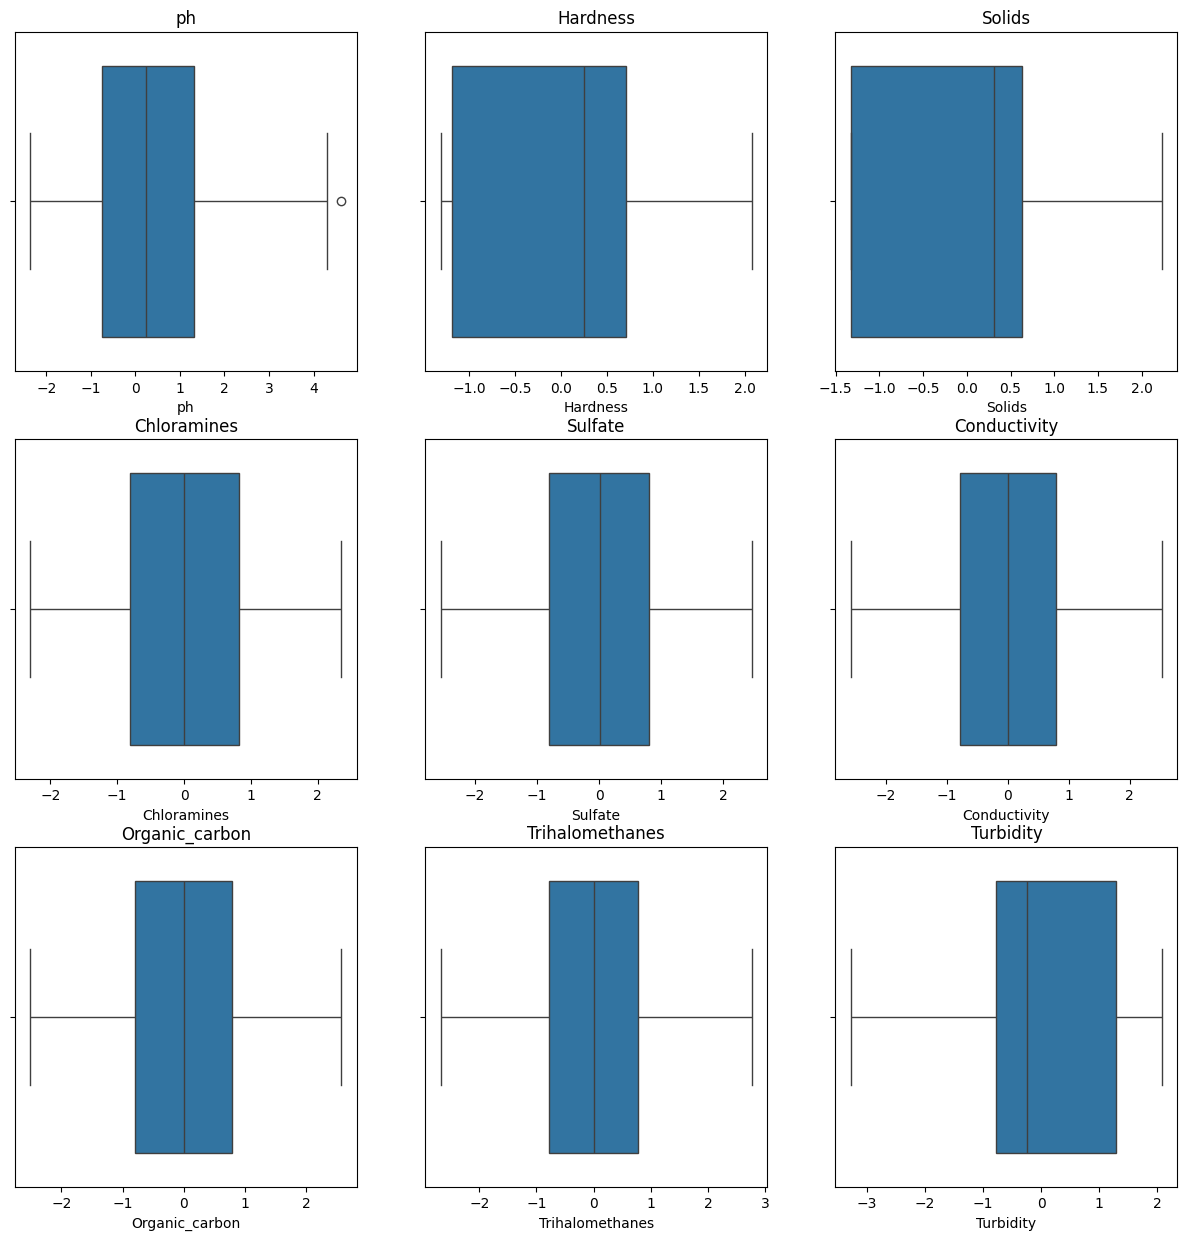

In [17]:
plt.figure(figsize = (15,15))
for ax, col in enumerate(X_train_transformed.columns):
    plt.subplot(3,3,ax+1)
    plt.title(col)
    sns.boxplot(x=X_train_transformed[col])

## 5. Finding Best Model with Best Parameters using Optuna Library

In [ ]:
# custom score function 
def custom_score(actual, predicted):
    return max(0, 100 * (1 - median_absolute_error(actual, predicted)))

# Create a custom scorer for use in cross-validation
custom_scorer = make_scorer(custom_score, greater_is_better=True)

# Define the objective function for Optuna
def objective(trial):
    # Choose the algorithm to tune
    model_name = trial.suggest_categorical('model', ['XGBoost', 'RandomForest', 'GradientBoosting'])

    if model_name == 'XGBoost':
        # XGBoost hyperparameters
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.5, log=True)
        n_estimators = trial.suggest_int('n_estimators', 50, 400)
        max_depth = trial.suggest_int('max_depth', 3, 20)
        subsample = trial.suggest_float('subsample', 0.02, 1.0)

        model = xgb.XGBRegressor(
            objective='reg:squarederror',
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            max_depth=max_depth,
            subsample=subsample,
            random_state=42
        )

    elif model_name == 'RandomForest':
        # Random Forest hyperparameters
        n_estimators = trial.suggest_int('n_estimators', 50, 400)
        max_depth = trial.suggest_int('max_depth', 3, 20)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
        bootstrap = trial.suggest_categorical('bootstrap', [True, False])

        model = RandomForestRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            bootstrap=bootstrap,
            random_state=42
        )

    elif model_name == 'GradientBoosting':
        # Gradient Boosting hyperparameters
        n_estimators = trial.suggest_int('n_estimators', 50, 400)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.5, log=True)
        max_depth = trial.suggest_int('max_depth', 3, 20)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

        model = GradientBoostingRegressor(
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=42
        )

    # Perform cross-validation using the custom scorer
    scores = cross_val_score(model, X_train_transformed, y_train, cv=3, scoring=custom_scorer)
    return np.mean(scores)


In [ ]:
# Run Optuna optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=200)

[I 2024-12-14 22:58:06,494] A new study created in memory with name: no-name-c7e9ee9a-e19a-4296-913e-f52674fc8884
[I 2024-12-14 22:58:41,017] Trial 0 finished with value: 82.22715255127379 and parameters: {'model': 'GradientBoosting', 'n_estimators': 289, 'learning_rate': 0.14364183914033013, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 0 with value: 82.22715255127379.
[I 2024-12-14 22:58:50,501] Trial 1 finished with value: 82.81113895754098 and parameters: {'model': 'XGBoost', 'learning_rate': 0.03631357018407276, 'n_estimators': 113, 'max_depth': 17, 'subsample': 0.4321393227255583}. Best is trial 1 with value: 82.81113895754098.
[I 2024-12-14 22:58:58,867] Trial 2 finished with value: 82.97488142122015 and parameters: {'model': 'XGBoost', 'learning_rate': 0.015249456494247589, 'n_estimators': 211, 'max_depth': 11, 'subsample': 0.6044699723184296}. Best is trial 2 with value: 82.97488142122015.
[I 2024-12-14 22:59:21,650] Trial 3 finished with value:

In [35]:
# Retrieve the best trial
best_trial = study.best_trial
best_params = best_trial.params
print("Best trial parameters:", best_params)
print("Best trial accuracy:", best_trial.value)

Best trial parameters: {'model': 'XGBoost', 'learning_rate': 0.022912448787353296, 'n_estimators': 393, 'max_depth': 4, 'subsample': 0.4194387404146799}
Best trial accuracy: 83.29079296019512


## 6. Training Model for best Parameters

#### Load train Data

In [5]:
df = pd.read_csv('./Dataset/train.csv', index_col="Index")

In [6]:
# Sample column names for the dataset
columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']

# Function to extract only numeric values from a column
def extract_numbers(value):
    numeric_match = re.findall(r"[-+]?\d*\.\d+|\d+", str(value))
    return float(numeric_match[0]) if numeric_match else None

for col in columns:
    df[col] = df[col].apply(extract_numbers)


In [7]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
Index,,,,,,,,,,
0,0.264409,2.673538,2.336743,1.431972,1.303685,1.563001,0.697062,2.010126,1.000000,1.252351
1,0.012034,1.000000,2.495853,0.911372,1.181754,1.741640,0.896108,1.807786,1.478430,1.124565
2,0.491167,2.000000,1.000000,1.506492,1.700871,2.322337,1.035440,1.548768,1.008907,0.525886
3,1.000000,2.000000,1.000000,2.658852,3.035266,2.409255,1.185713,1.232375,1.249935,0.715288
4,0.075488,1.656818,1.095344,2.169616,1.520531,1.990604,1.237182,1.589307,1.000000,0.890722


In [8]:
X = df.iloc[: , :-1]
y = df.iloc[:, -1]

### Transformation

In [19]:
pt = PowerTransformer(method='box-cox')
X_train_transformed = pt.fit_transform(X)
pd.DataFrame({'cols':X.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,ph,0.488052
1,Hardness,0.310380
2,Solids,0.303604
3,Chloramines,0.013607
4,Sulfate,-0.021237
5,Conductivity,0.024477
6,Organic_carbon,0.024060
7,Trihalomethanes,-0.006743
8,Turbidity,-0.274949


### Standardization

In [20]:
scaler= StandardScaler()
X_train_transformed = pd.DataFrame(scaler.fit_transform(X_train_transformed), columns=df.columns[:-1])
X_train_transformed.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-1.018263,1.703728,1.132882,-0.192329,-1.061290,-0.892927,-1.881321,0.575264,-0.770760
1,-2.099610,-1.308100,1.351514,-1.745369,-1.403478,-0.519085,-1.019551,0.209280,0.441018
2,-0.528176,0.717316,-1.325747,-0.017368,-0.138103,0.479757,-0.521366,-0.324648,-0.741807
3,0.251181,0.717316,-1.325747,1.950198,1.854401,0.607811,-0.052638,-1.114656,-0.063411
4,-1.653790,0.123469,-1.091249,1.244198,-0.526537,-0.056162,0.094647,-0.235400,-0.770760


### Model Building

In [93]:
## Best Parameters from optuna 
# Best trial parameters: {'model': 'XGBoost', 'learning_rate': 0.022912448787353296, 'n_estimators': 393, 'max_depth': 4, 'subsample': 0.4194387404146799}
best_params = {
    'learning_rate': 0.022912448787353296,
    'n_estimators': 1000,
    'max_depth': 50,
    'subsample': 1
}

# Train the XGBoost regressor with the best parameters
xgboost_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    learning_rate=best_params['learning_rate'],
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    subsample=best_params['subsample'],
    random_state=42
)

# Train the model on the training data
xgboost_model.fit(X, y)

# To get Train Accuracy
def custom_score(actual, predicted):
    return max(0, 100 * (1 - median_absolute_error(actual, predicted)))

y_train = xgboost_model.predict(X)
final_score = custom_score(y_train,y)

# Print Custom Score on Train Data
print(f"Final Custom Score on Train Data: {final_score}")


Final Custom Score on Train Data: 99.9783822435012


## 7. Prediction Using Best Model

### Load Test Data

In [94]:
df_test = pd.read_csv('./Dataset/test.csv', index_col="Index")

In [95]:
# Sample column names for the dataset
columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# Function to extract only numeric values from a column
def extract_numbers(value):
    numeric_match = re.findall(r"[-+]?\d*\.\d+|\d+", str(value))
    return float(numeric_match[0]) if numeric_match else None

for col in columns:
    df_test[col] = df_test[col].apply(extract_numbers)


In [96]:
df_test.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Index,,,,,,,,,
10000,0.458326,1.000000,1.573929,1.540880,1.659576,2.156778,1.665096,2.105437,0.980957
10001,0.006164,2.379717,1.000000,1.225821,1.320635,2.251759,1.333259,1.480757,1.502542
10002,2.000000,2.000000,2.036084,2.430112,1.178618,1.614353,0.890702,1.824291,1.118714
10003,0.562824,1.836970,1.000000,1.910825,2.731592,1.626107,0.711949,2.598104,1.674618
10004,1.000000,1.000000,2.338528,1.940168,1.269851,1.832447,0.947763,1.052021,1.000000


In [97]:
X_test = df_test
X_test

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Index,,,,,,,,,
10000,0.458326,1.000000,1.573929,1.540880,1.659576,2.156778,1.665096,2.105437,0.980957
10001,0.006164,2.379717,1.000000,1.225821,1.320635,2.251759,1.333259,1.480757,1.502542
10002,2.000000,2.000000,2.036084,2.430112,1.178618,1.614353,0.890702,1.824291,1.118714
10003,0.562824,1.836970,1.000000,1.910825,2.731592,1.626107,0.711949,2.598104,1.674618
10004,1.000000,1.000000,2.338528,1.940168,1.269851,1.832447,0.947763,1.052021,1.000000
...,...,...,...,...,...,...,...,...,...
14995,2.000000,1.107381,2.000000,2.506261,2.521742,2.431430,1.233360,1.432172,1.000000
14996,0.788690,1.540950,2.000000,1.424656,1.669503,1.355871,1.346191,1.074413,2.000000
14997,0.181496,2.000000,2.000000,1.957594,2.402041,1.730559,0.870003,1.449529,1.161218


### Transformation

In [98]:
pt = PowerTransformer(method='box-cox')
X_test_transformed = pt.fit_transform(X_test)
pd.DataFrame({'cols':X_test.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,ph,0.498434
1,Hardness,0.358402
2,Solids,0.403669
3,Chloramines,0.068261
4,Sulfate,-0.046077
5,Conductivity,-0.044067
6,Organic_carbon,-0.034266
7,Trihalomethanes,0.050011
8,Turbidity,-0.188710


### Standardization

In [99]:
scaler= StandardScaler()
X_test_transformed = pd.DataFrame(scaler.fit_transform(X_test_transformed), columns=df_test.columns)
X_test_transformed.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-0.603493,-1.305849,-0.133045,0.019827,-0.237576,0.245878,1.120676,0.727954,-0.848369
1,-2.189929,1.294509,-1.345734,-0.771581,-1.034802,0.394008,0.362101,-0.491859,0.448319
2,1.343768,0.706441,0.660759,1.633357,-1.434971,-0.757140,-1.029475,0.228618,-0.437566
3,-0.409878,0.431864,-1.345734,0.775678,1.472590,-0.731865,-1.810601,1.466953,0.761752
4,0.250225,-1.305849,1.123151,0.829632,-1.172490,-0.316804,-0.814003,-1.656191,-0.787624


### Prediction

In [100]:
# Make predictions on the test set
y_pred = xgboost_model.predict(X_test_transformed)

# Print results 10 predictions
print("Predictions: ", y_pred[:10])

Predictions:  [1.08381    1.1223326  0.89840806 1.1578033  1.1924691  1.1613445
 0.83273065 1.3468863  1.109352   1.052362  ]


In [101]:
y_pred

array([1.08381   , 1.1223326 , 0.89840806, ..., 1.112446  , 1.260665  ,
       0.784453  ], dtype=float32)

In [102]:
# Create a submission dataset 
output_df = pd.DataFrame({
    'Index': df_test.index,
    'Potability': y_pred
})

# Save the DataFrame to a CSV file
output_df.to_csv('predictions.csv', index=False)
print("Predictions saved to 'predictions.csv'.")

Predictions saved to 'predictions.csv'.
